In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
api_key = '55fd9f09c162a589ee26dc37ca266b12'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    #print(city)
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #response = requests.get(query_url + city).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather  = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat      = city_weather['coord']['lat']
        city_lng      = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds   = city_weather['clouds']['all']
        city_wind     = city_weather['wind']['speed']
        city_country  = city_weather['sys']['country']
        city_date     = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        #print(city_data)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | kochubey
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | vilyuchinsk
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | camana
Processing Record 9 of Set 1 | darab
Processing Record 10 of Set 1 | amuntai
Processing Record 11 of Set 1 | nogliki
Processing Record 12 of Set 1 | mount pearl
Processing Record 13 of Set 1 | kindu
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | lorengau
Processing Record 16 of Set 1 | hadibu
Processing Record 17 of Set 1 | haenam
Processing Record 18 of Set 1 | ahau
City not found. Skipping...
Processing Record 19 of Set 1 | enewetak
Processing Record 20 of Set 1 | krasnyy kholm
Processing Record 21 of Set 1 | katsuura
Processing Record 22 of Set 1 | teguise
Proces

Processing Record 39 of Set 4 | lecheng
Processing Record 40 of Set 4 | la'ie
Processing Record 41 of Set 4 | pereslavl'-zalesskiy
Processing Record 42 of Set 4 | kasongo-lunda
Processing Record 43 of Set 4 | calama
Processing Record 44 of Set 4 | port lincoln
Processing Record 45 of Set 4 | mitu
Processing Record 46 of Set 4 | punta arenas
Processing Record 47 of Set 4 | changji
Processing Record 48 of Set 4 | paramonga
Processing Record 49 of Set 4 | antalaha
Processing Record 0 of Set 5 | valparaiso
Processing Record 1 of Set 5 | wad medani
Processing Record 2 of Set 5 | al artawiyah
Processing Record 3 of Set 5 | tak bai
Processing Record 4 of Set 5 | kudahuvadhoo
Processing Record 5 of Set 5 | kingston
Processing Record 6 of Set 5 | sao joao do piaui
Processing Record 7 of Set 5 | kaa-khem
Processing Record 8 of Set 5 | cozumel
Processing Record 9 of Set 5 | hotan
Processing Record 10 of Set 5 | livingston
Processing Record 11 of Set 5 | itsa
Processing Record 12 of Set 5 | saipan

Processing Record 31 of Set 8 | puerto carreno
Processing Record 32 of Set 8 | vanino
Processing Record 33 of Set 8 | mugia
Processing Record 34 of Set 8 | colonia
Processing Record 35 of Set 8 | beykonak
Processing Record 36 of Set 8 | uturoa
Processing Record 37 of Set 8 | lazaro cardenas
Processing Record 38 of Set 8 | datong
Processing Record 39 of Set 8 | howrah
Processing Record 40 of Set 8 | yumbe
Processing Record 41 of Set 8 | luanda
Processing Record 42 of Set 8 | tsiombe
Processing Record 43 of Set 8 | karratha
Processing Record 44 of Set 8 | kailua-kona
Processing Record 45 of Set 8 | ilulissat
Processing Record 46 of Set 8 | ugoofaaru
Processing Record 47 of Set 8 | kulia village
City not found. Skipping...
Processing Record 48 of Set 8 | gummi
Processing Record 49 of Set 8 | butiama
Processing Record 0 of Set 9 | marvejols
Processing Record 1 of Set 9 | lerwick
Processing Record 2 of Set 9 | eldorado at santa fe
Processing Record 3 of Set 9 | tindouf
Processing Record 4 o

Processing Record 20 of Set 12 | pustoshka
Processing Record 21 of Set 12 | mirabad
Processing Record 22 of Set 12 | gulf park estates
Processing Record 23 of Set 12 | kovdor
Processing Record 24 of Set 12 | arteche
Processing Record 25 of Set 12 | broome
Processing Record 26 of Set 12 | selebi-phikwe
Processing Record 27 of Set 12 | wanning
Processing Record 28 of Set 12 | belozersk
Processing Record 29 of Set 12 | paranhos
Processing Record 30 of Set 12 | labytnangi
Processing Record 31 of Set 12 | owando
Processing Record 32 of Set 12 | katabu
Processing Record 33 of Set 12 | pizarro
Processing Record 34 of Set 12 | rongelap
Processing Record 35 of Set 12 | mejit
Processing Record 36 of Set 12 | panorama
Processing Record 37 of Set 12 | la palma
Processing Record 38 of Set 12 | port sudan
Processing Record 39 of Set 12 | andalgala
Processing Record 40 of Set 12 | monahans
Processing Record 41 of Set 12 | hampton bays
Processing Record 42 of Set 12 | kegeyli shahar
Processing Record 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,8.33,90,50,12.90,TF,1708389022
1,kochubey,44.3861,46.5825,1.47,82,100,4.29,RU,1708389022
2,isafjordur,66.0755,-23.1240,1.94,97,100,3.94,IS,1708389022
3,invercargill,-46.4000,168.3500,13.90,57,48,5.81,NZ,1708388961
4,vilyuchinsk,52.9306,158.4028,-6.85,91,100,1.99,RU,1708389024


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("Output/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("Output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,8.33,90,50,12.90,TF,1708389022
1,kochubey,44.3861,46.5825,1.47,82,100,4.29,RU,1708389022
2,isafjordur,66.0755,-23.1240,1.94,97,100,3.94,IS,1708389022
3,invercargill,-46.4000,168.3500,13.90,57,48,5.81,NZ,1708388961
4,vilyuchinsk,52.9306,158.4028,-6.85,91,100,1.99,RU,1708389024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


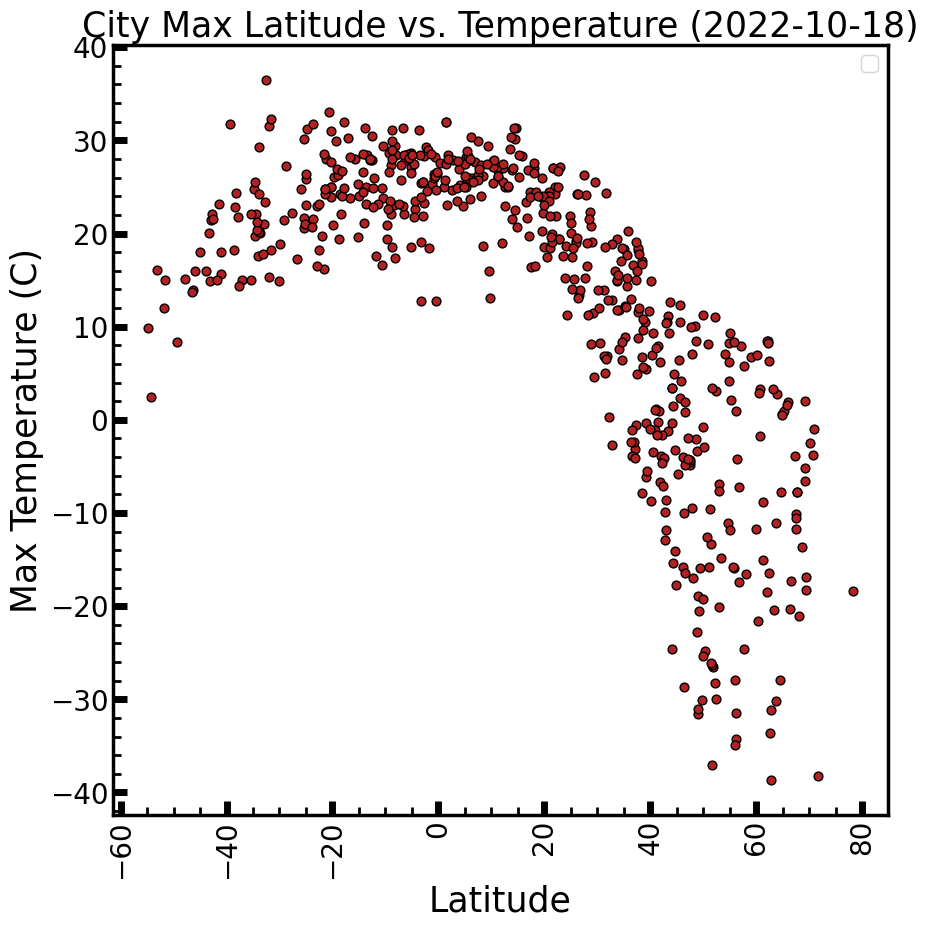

In [10]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', s=40, color='firebrick', edgecolor='k')
#plt.plot(city_data_df["Lat"], city_data_df["Max Temp"], marker='.', markersize=16, color='firebrick', linestyle="none")
plt.title('City Max Latitude vs. Temperature (2022-10-18)',fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('Max Temperature (C)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig1.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


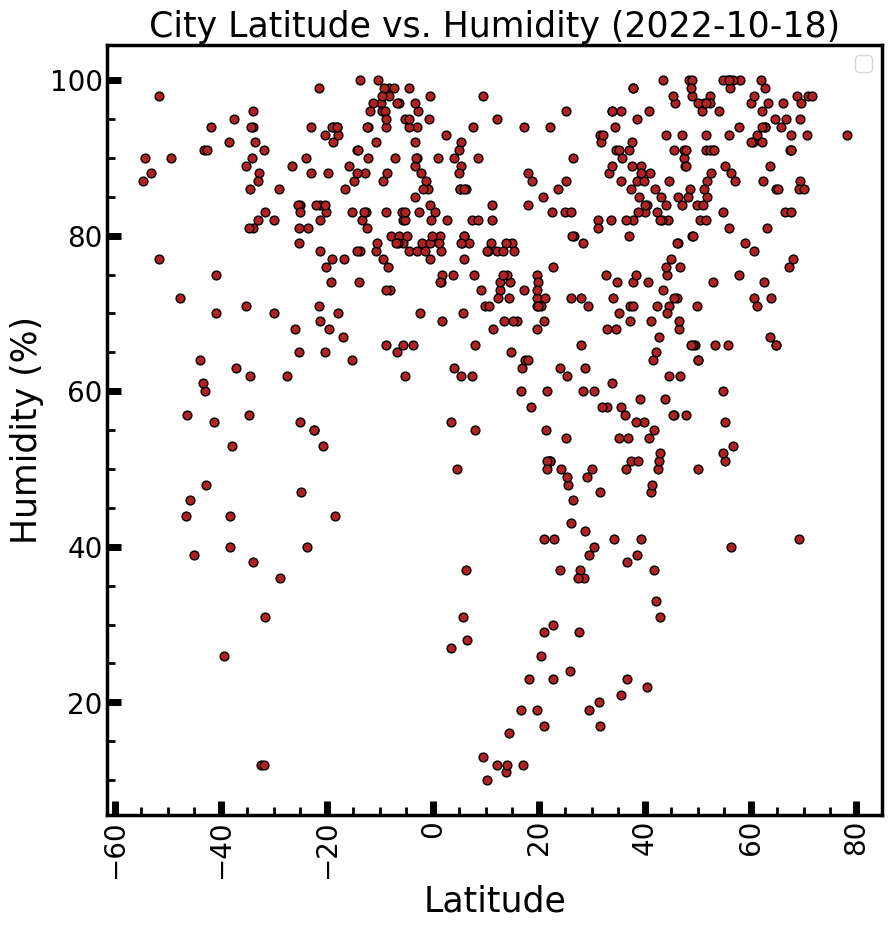

In [11]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', s=40, color='firebrick', edgecolor='k')
#plt.plot(city_data_df["Lat"], city_data_df["Max Temp"], marker='.', markersize=16, color='firebrick', linestyle="none")
plt.title('City Latitude vs. Humidity (2022-10-18)',fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('Humidity (%)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig2.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


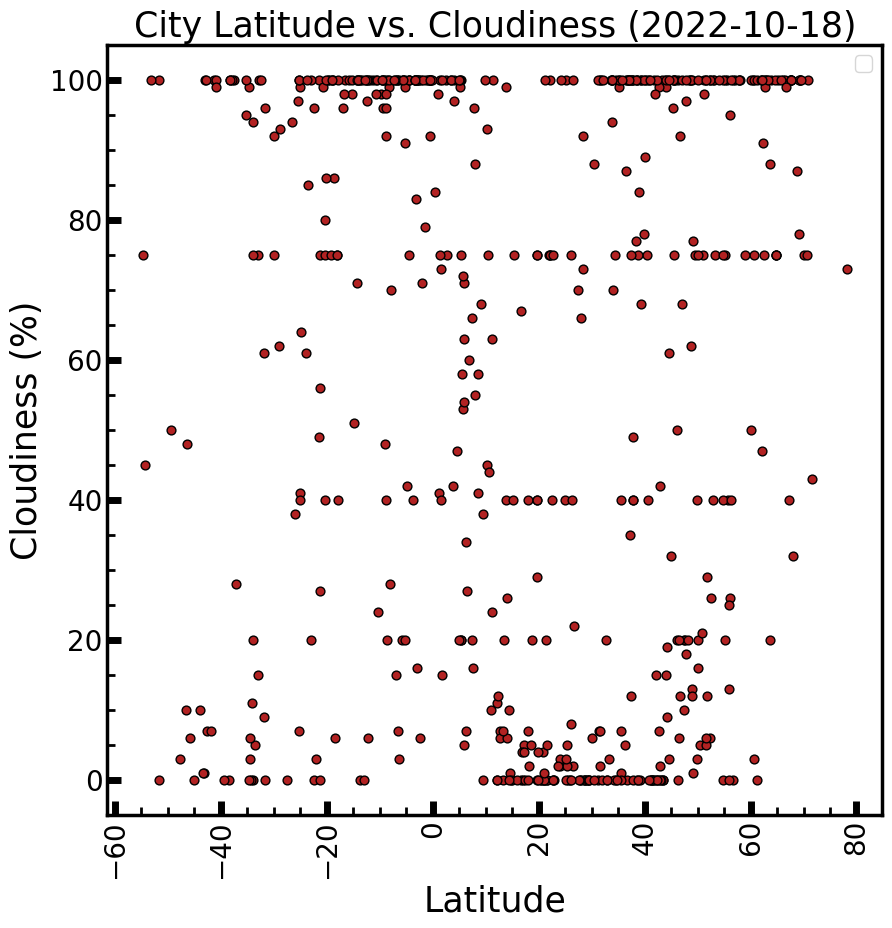

In [12]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', s=40, color='firebrick', edgecolor='k')
#plt.plot(city_data_df["Lat"], city_data_df["Max Temp"], marker='.', markersize=16, color='firebrick', linestyle="none")
plt.title('City Latitude vs. Cloudiness (2022-10-18)',fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('Cloudiness (%)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig3.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


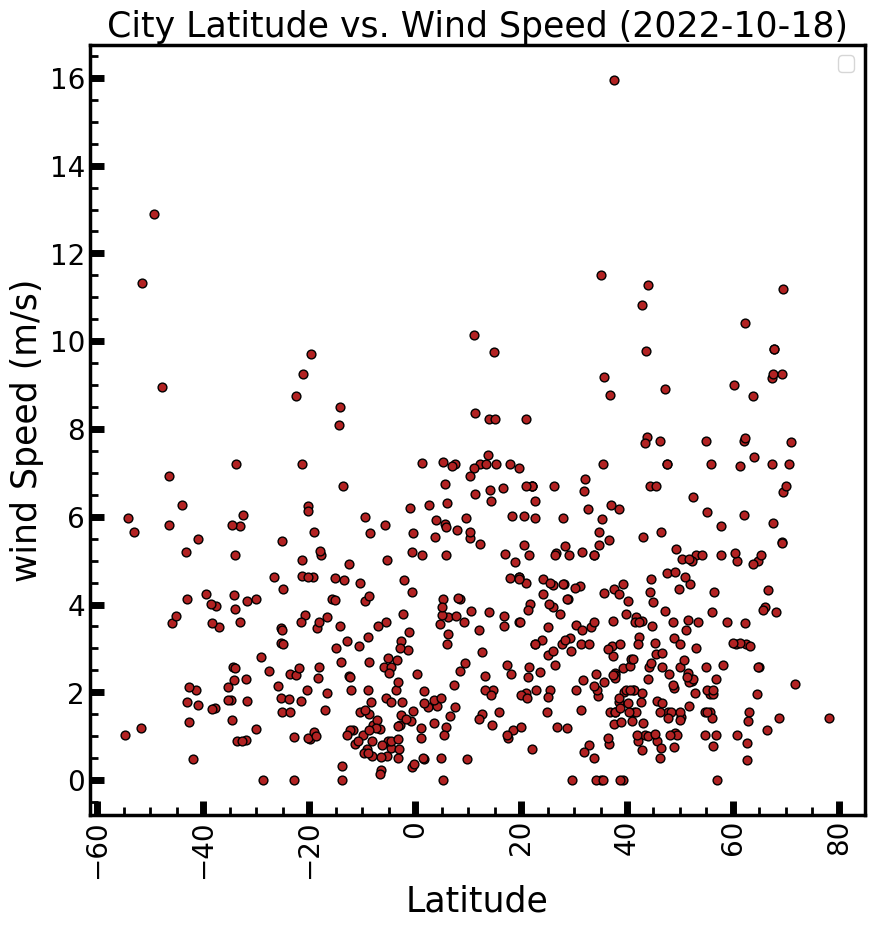

In [13]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', s=40, color='firebrick', edgecolor='k')
#plt.plot(city_data_df["Lat"], city_data_df["Max Temp"], marker='.', markersize=16, color='firebrick', linestyle="none")
plt.title('City Latitude vs. Wind Speed (2022-10-18)',fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('wind Speed (m/s)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [14]:
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def reg(dataframe, x, y, output):
    
    # Add the linear regression equation and line to plot
    x_values = dataframe[x]
    y_values = dataframe[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values                             = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    fig = plt.figure(figsize=(10,10))
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 2.50
    plt.scatter(x_values,y_values, marker='o', s=40, color='firebrick', edgecolor='k')
    plt.plot(x_values,regress_values,"k-")
    plt.annotate(line_eq, (np.mean(x_values),np.mean(y_values)), fontsize=25, color="g")
    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)
    plt.minorticks_on() 
    plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
    plt.tick_params(which='minor', length=6, width=2.0, direction='in')
    print(f"The r-value is: {rvalue}")
    plt.savefig(f"Output/ {output}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] > 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kochubey,44.3861,46.5825,1.47,82,100,4.29,RU,1708389022
2,isafjordur,66.0755,-23.1240,1.94,97,100,3.94,IS,1708389022
4,vilyuchinsk,52.9306,158.4028,-6.85,91,100,1.99,RU,1708389024
5,tazovsky,67.4667,78.7000,-11.68,91,100,9.17,RU,1708389024
8,darab,28.7519,54.5444,8.15,42,0,1.19,IR,1708389027


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,8.33,90,50,12.90,TF,1708389022
3,invercargill,-46.4000,168.3500,13.90,57,48,5.81,NZ,1708388961
6,waitangi,-43.9535,-176.5597,16.01,64,10,6.26,NZ,1708389025
7,camana,-16.6228,-72.7111,23.80,86,100,1.99,PE,1708389026
9,amuntai,-2.4177,115.2494,29.32,70,6,1.79,ID,1708389025


###  Temperature vs. Latitude Linear Regression Plot


The r-value is: -0.8148470513880962


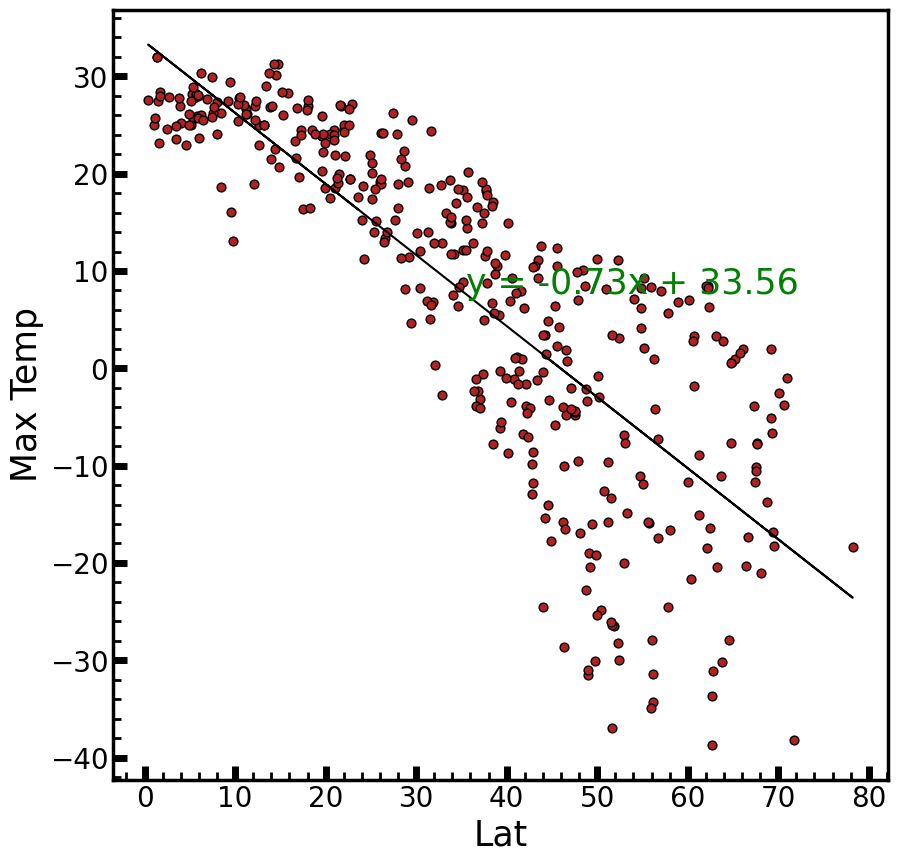

In [17]:
# Linear regression on Northern Hemisphere

reg(northern_hemi_df, "Lat", "Max Temp", "nMax")

The r-value is: 0.5122385308254731


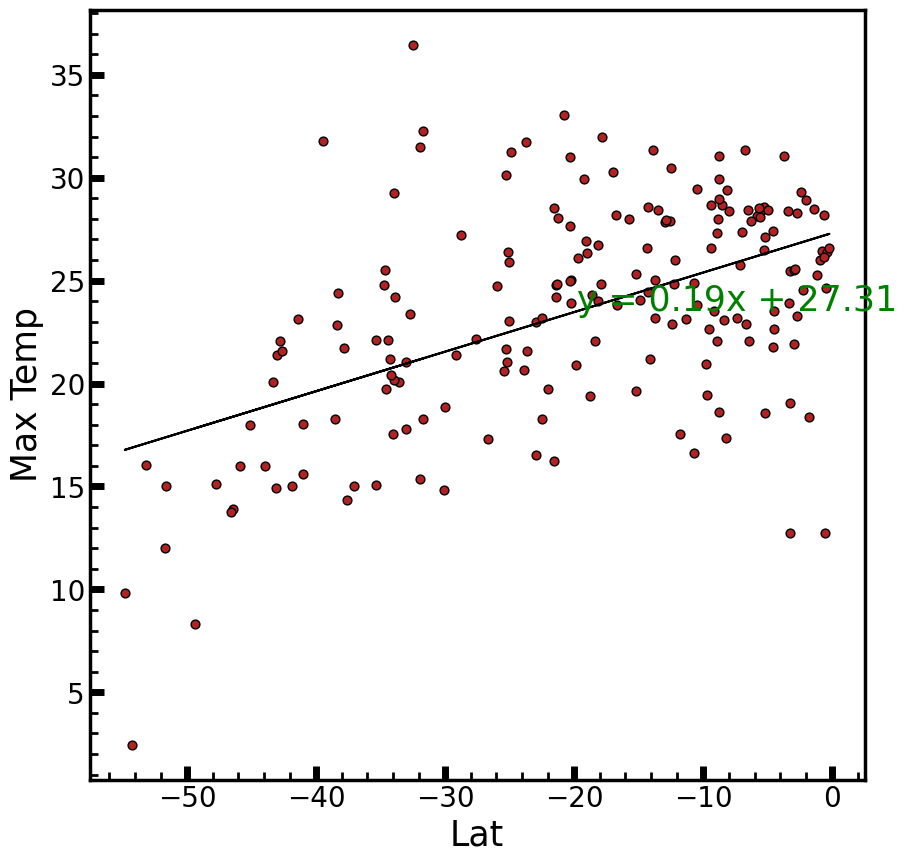

In [18]:
# Linear regression on Northern Hemisphere

reg(southern_hemi_df, "Lat", "Max Temp", "sMax")

**Discussion about the linear relationship:** For cities in northern hemispere as latitude increases maximum temerperature by city decreases. For southern hemispere as latitude decreases the maximum temperature of cities decreases. Basically as move close to either north or south pole maximum temerature decreases as poles sunlight received by sun decreases as one move away from equator towards poles.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.32155806153850214


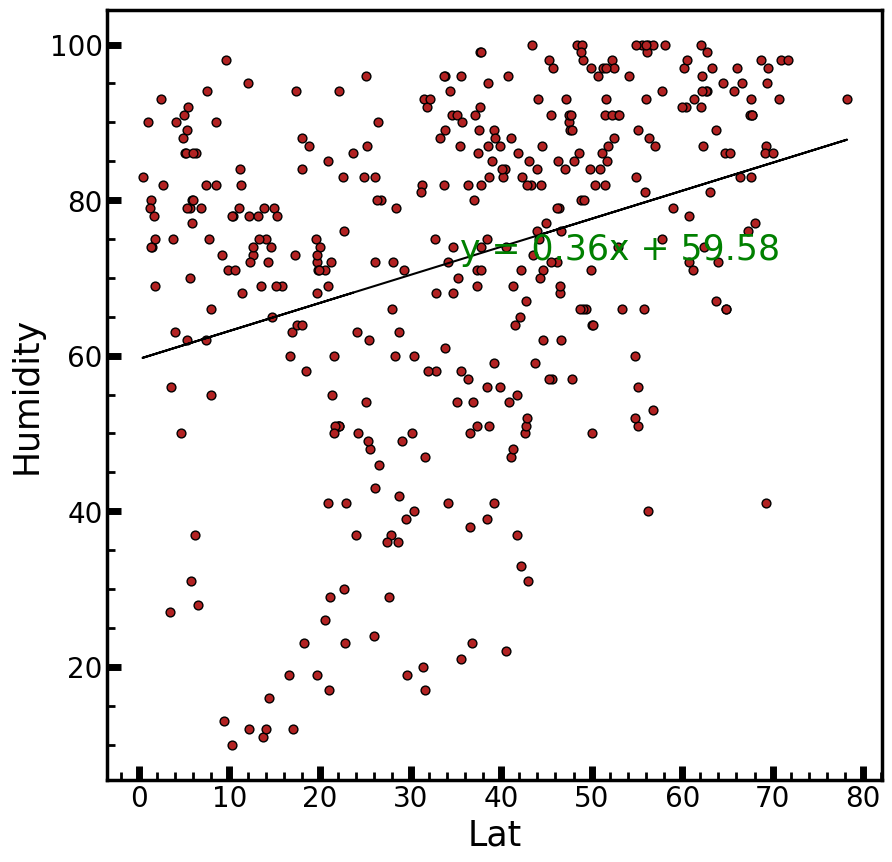

The r-value is: 0.3543174850112783


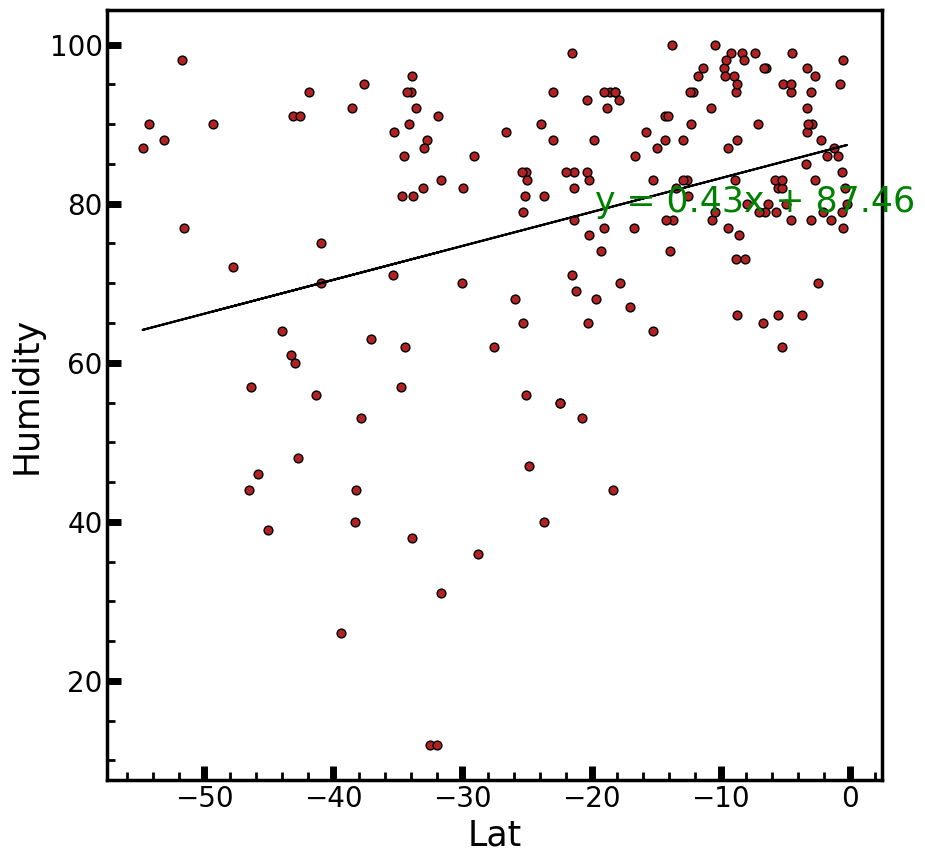

In [19]:
# Northern & Southern Hemisphere
reg(northern_hemi_df, "Lat", "Humidity", "nHum")
reg(southern_hemi_df, "Lat", "Humidity", "sHum")

**Discussion about the linear relationship:** The relation between Humidity and latitude is not tight and shows a significant scatter for both cities in northern and southen hemisphere. Hence conclusion cant be drawn. However with increase in latitude humidity increases for both hemisheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2669577314600221


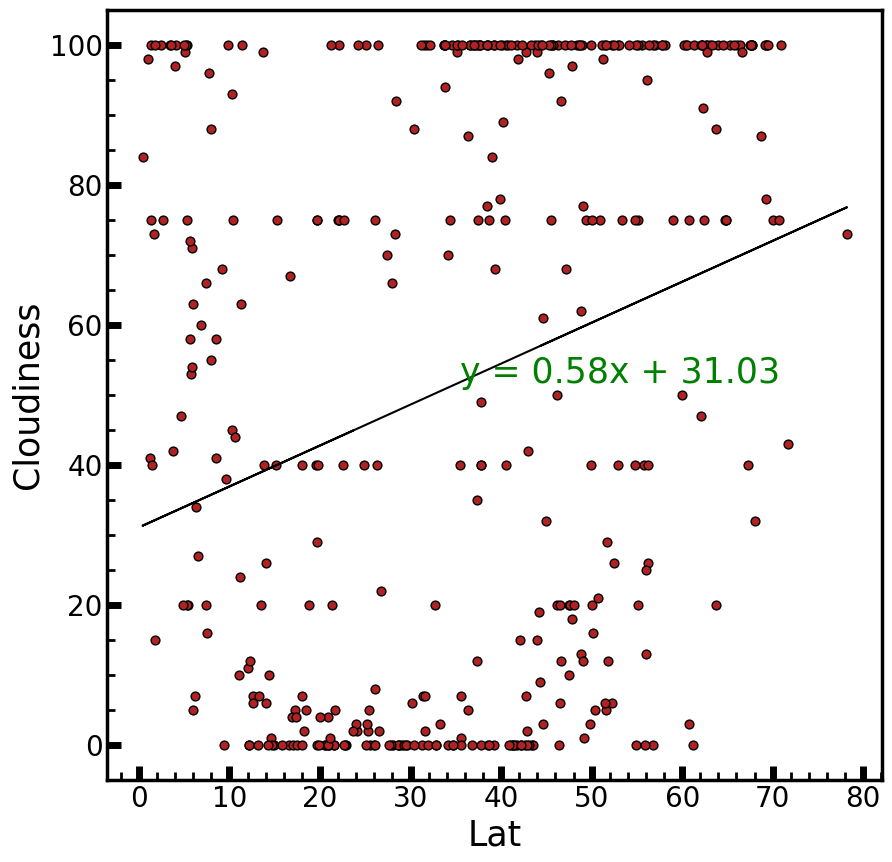

The r-value is: 0.3535802461481531


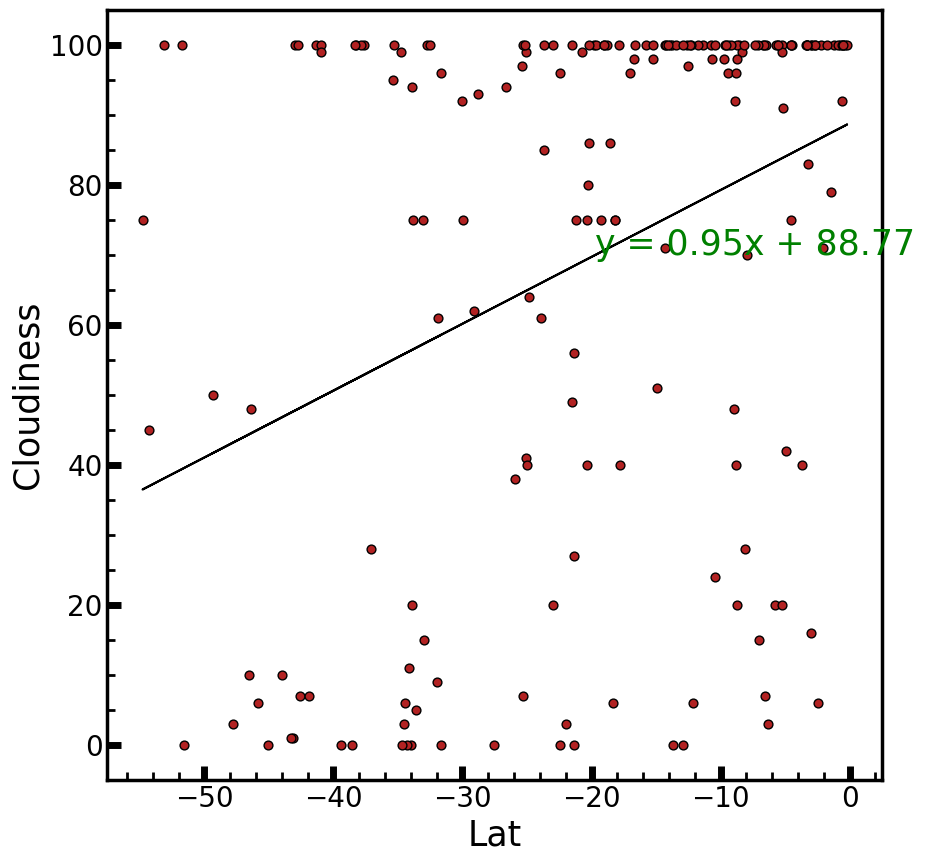

In [20]:
# Northern & Southern Hemisphere
reg(northern_hemi_df, "Lat", "Cloudiness", "nCloud")
reg(southern_hemi_df, "Lat", "Cloudiness", "sCloud")

**Discussion about the linear relationship:** The relation between Cloudiness and latitude is not tight and shows a significant scatter for both cities in northern and southen hemisphere. Hence conclusion cant be drawn. However with increase in latitude cloudiness increases for both hemisheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03331275250240784


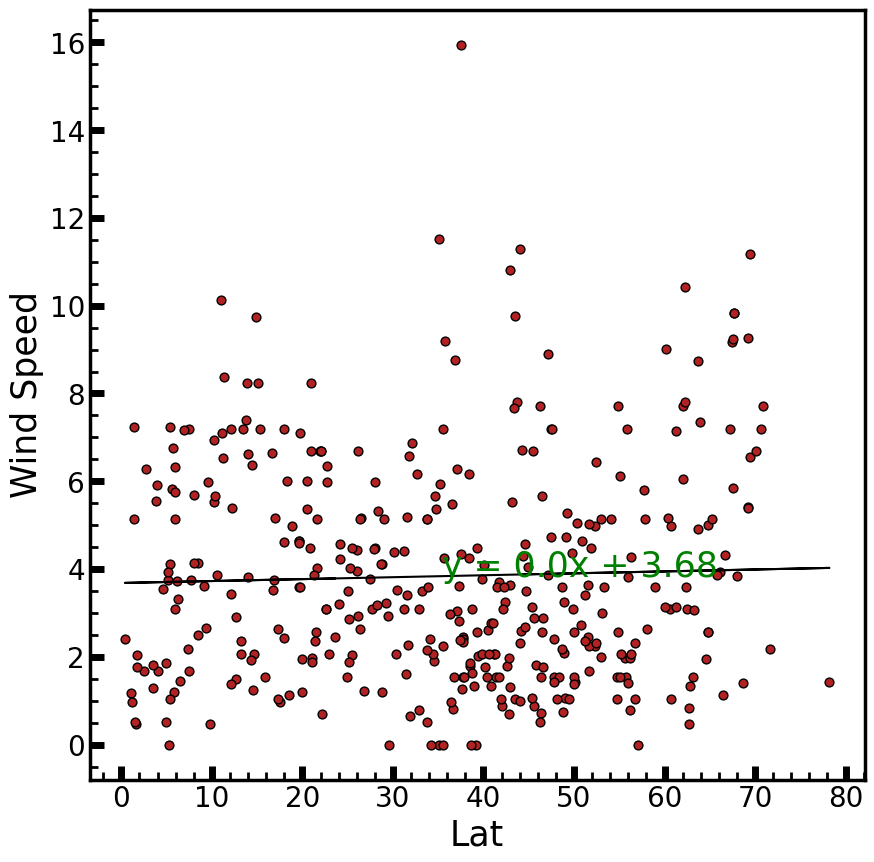

The r-value is: -0.2967428680095207


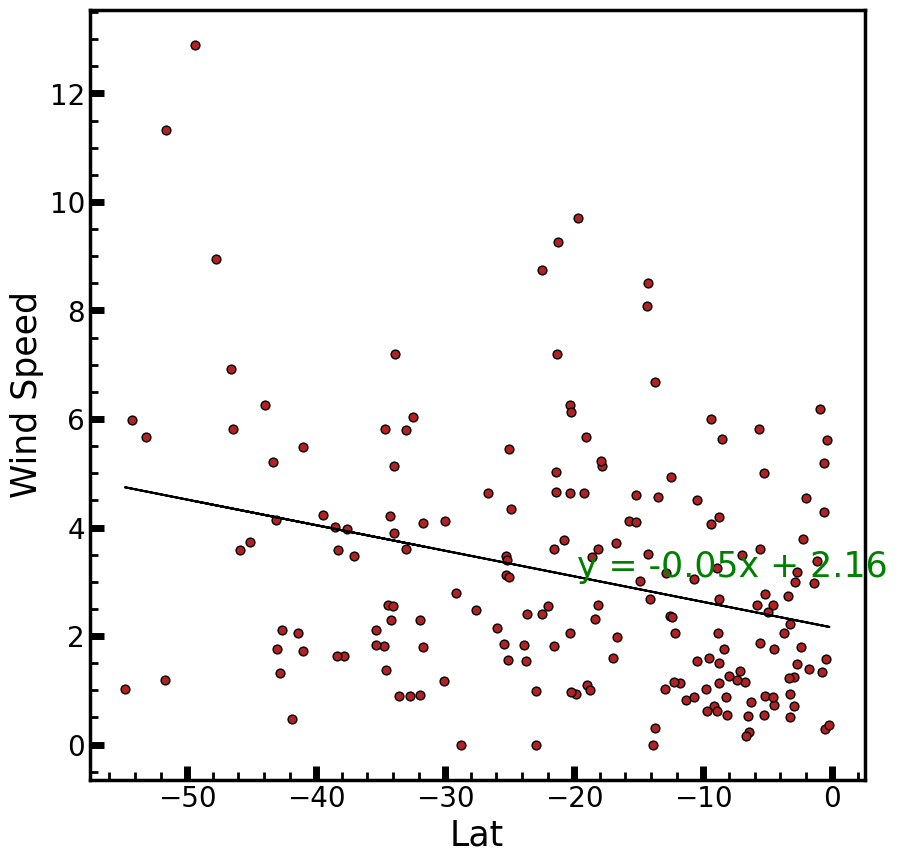

In [21]:
# Northern & Southern Hemisphere
reg(northern_hemi_df, "Lat", "Wind Speed", "nWind")
reg(southern_hemi_df, "Lat", "Wind Speed", "sWind")

**Discussion about the linear relationship:** For both cities in the northern and southern hemispheres, the relationship between cloudiness and latitude is not linear and exhibits a considerable spread. On the other hand, we can state that wind speed increases with distance from the equator. Since most of the continents and landmasses are in the northern hemisphere, this effect is more noticeable in the southern hemisphere. Nonetheless, the southern hemisphere has more oceans than landmasses, which permits interrupted wind flow.